# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

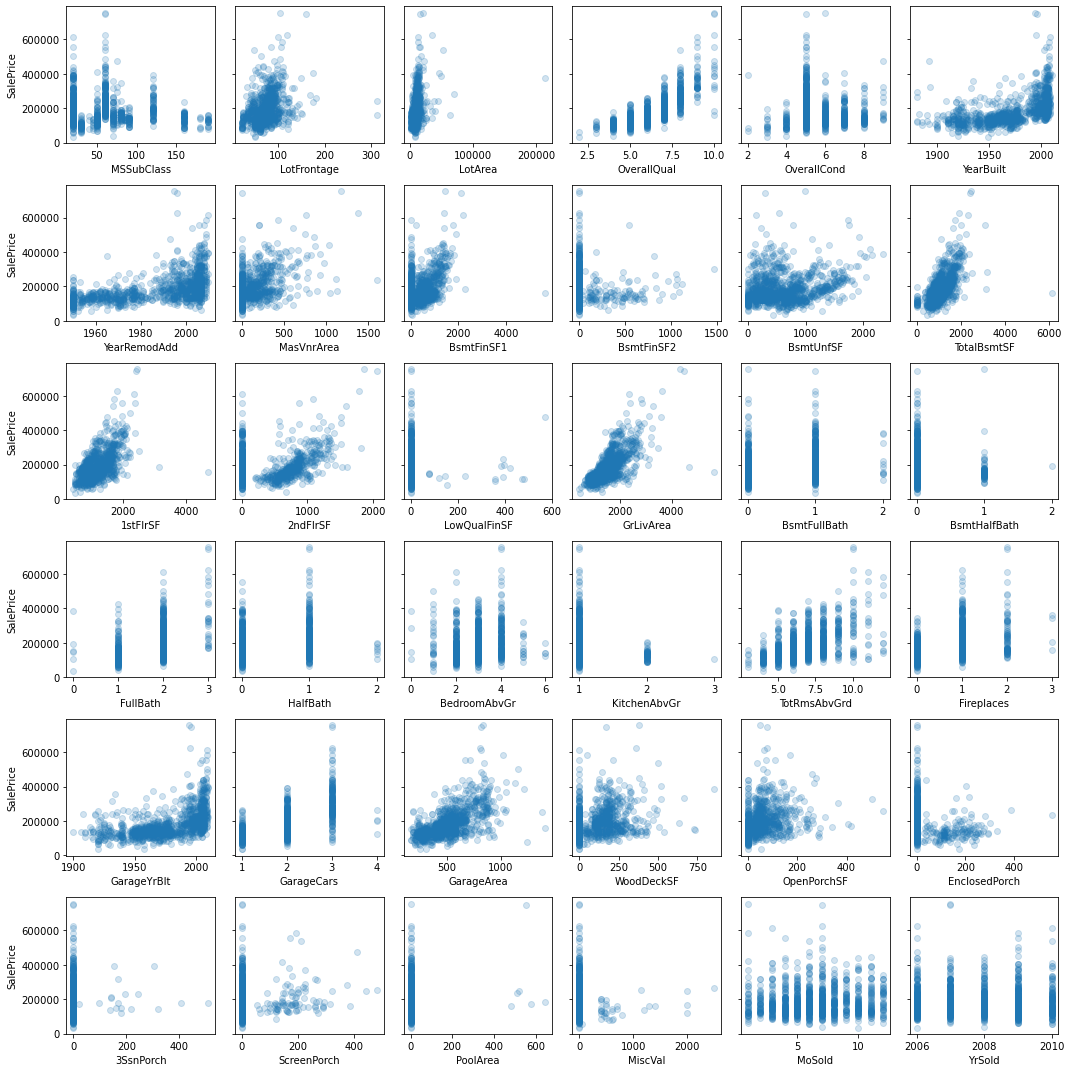

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

In [ ]:
# Your written answer here
"""
GarageArea & GrLivArea
"""


### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

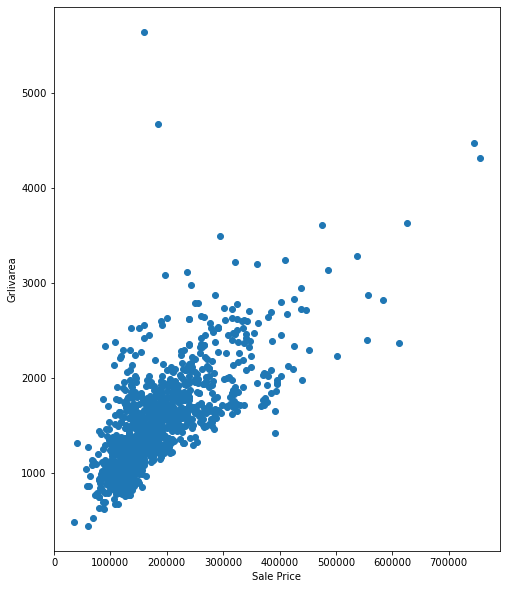

In [7]:
plt.figure(figsize=(8,10))
plt.scatter(ames['SalePrice'], ames['GrLivArea'])
plt.xlabel('Sale Price')
plt.ylabel('Grlivarea')
plt.show()

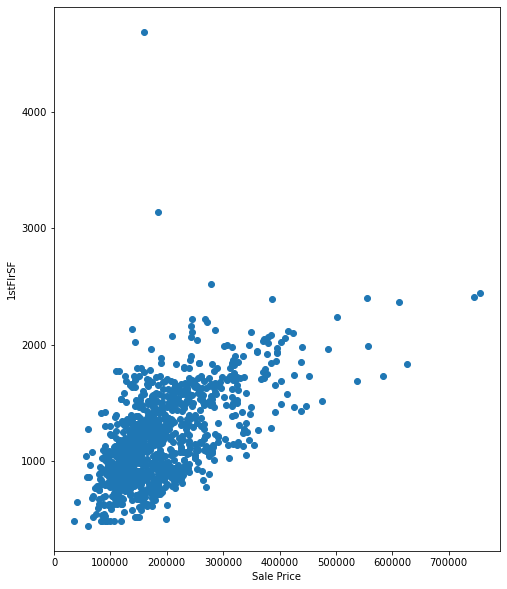

In [8]:
plt.figure(figsize=(8,10))
plt.scatter(ames['SalePrice'], ames['1stFlrSF'])
plt.xlabel('Sale Price')
plt.ylabel('1stFlrSF')
plt.show()

In [3]:
# Your code 
y_intial = ames['SalePrice']
X_raw = ames[['GrLivArea', '1stFlrSF']]





In [9]:
X_area_log = X_raw.copy()
X_area_log["log(GrLivArea)"] = np.log(X_area_log["GrLivArea"])

In [10]:
y_log = np.log(y_intial)
y_log.name = "log(sale_price)"
y_log


Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: log(sale_price), Length: 1121, dtype: float64

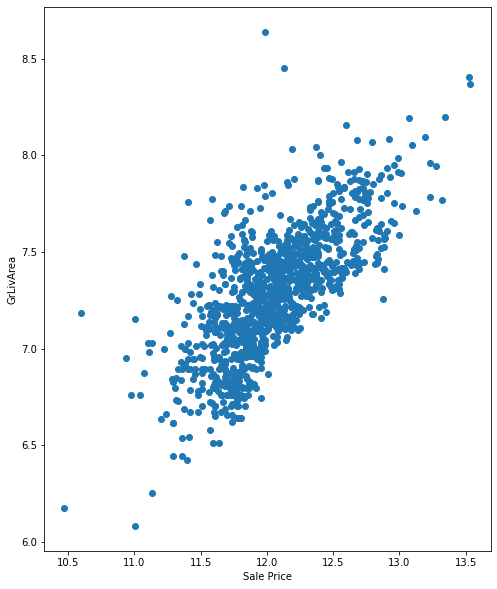

In [13]:
plt.figure(figsize=(8,10))
plt.scatter(y_log, X_area_log['log(GrLivArea)'])
plt.xlabel('Sale Price')
plt.ylabel('GrLivArea')
plt.show()

In [14]:
X_flr_log = X_raw.copy()
X_flr_log["log(1stFlrSF)"] = np.log(X_flr_log["1stFlrSF"])

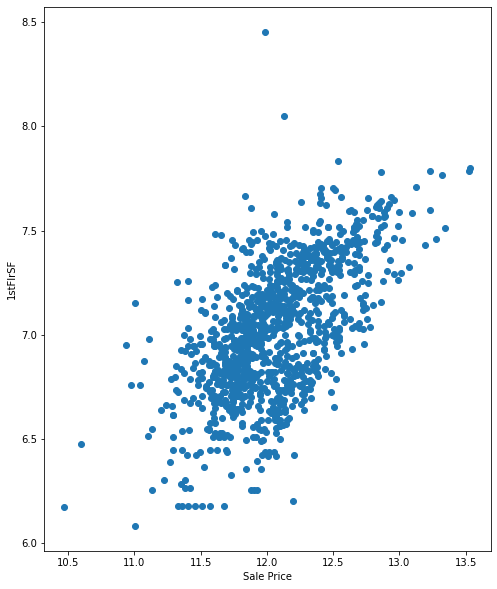

In [16]:
plt.figure(figsize=(8,10))
plt.scatter(y_log, X_flr_log['log(1stFlrSF)'])
plt.xlabel('Sale Price')
plt.ylabel('1stFlrSF')
plt.show()

In [4]:
X_log = X_raw.copy()

X_log = np.log(X_log)

X_log


,GrLivArea,1stFlrSF
Id,,
1,7.444249,6.752270
2,7.140453,7.140453
3,7.487734,6.824374
4,7.448334,6.867974
5,7.695303,7.043160
...,...,...
1456,7.406711,6.859615
1457,7.636752,7.636752
1458,7.757906,7.080026


Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [17]:
# Your code here - prepare data for modeling
y_log = np.log(y_intial)
y_log.name = "log(sale_price)"
y_log

X_log = X_raw.copy()

X_log = np.log(X_log)

X_log

,GrLivArea,1stFlrSF
Id,,
1,7.444249,6.752270
2,7.140453,7.140453
3,7.487734,6.824374
4,7.448334,6.867974
5,7.695303,7.043160
...,...,...
1456,7.406711,6.859615
1457,7.636752,7.636752
1458,7.757906,7.080026


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [18]:
import statsmodels.api as sm 

In [19]:
# Your code here - build a model
new_model = sm.OLS(y_log, sm.add_constant(X_log))
new_results = new_model.fit()


In [20]:
new_results.rsquared_adj

0.5943980159356046

In [21]:
new_results.params

const        4.304259
GrLivArea    0.683591
1stFlrSF     0.394286
dtype: float64

In [22]:
old_model = sm.OLS(y_intial, sm.add_constant(X_raw))
old_results = old_model.fit()

In [23]:
old_results.rsquared_adj

0.5621561650336131

In [24]:
old_results.params

const       -21556.972467
GrLivArea       84.197457
1stFlrSF        66.567177
dtype: float64

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

In [ ]:
# Your code here - evaluate the model
"""
For an increase of 1 square foot leads to an associated increase of about 0.68 in the log of sale price.
For an increase of 1 square foot leads to an associated increase of about 0.39 in the log of sale price.

"""


## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.